<a href="https://colab.research.google.com/github/Samuel442/Python/blob/main/Colab/pratica_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercícios NumPy

In [ ]:
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

In [ ]:
dado = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

Tipo de dado: <class 'numpy.ndarray'>
Diâmetros Laranjas: [ 2.96  3.91  4.42 ... 12.55 12.75 12.87]
Pesos Laranjas: [ 86.76  88.05  95.17 ... 218.07 230.13 231.09]
Diâmetros Toranjas: [ 7.63  7.69  7.72 ... 15.59 15.92 16.45]
Pesos Toranjas: [126.79 133.98 135.56 ... 256.5  260.14 261.51]


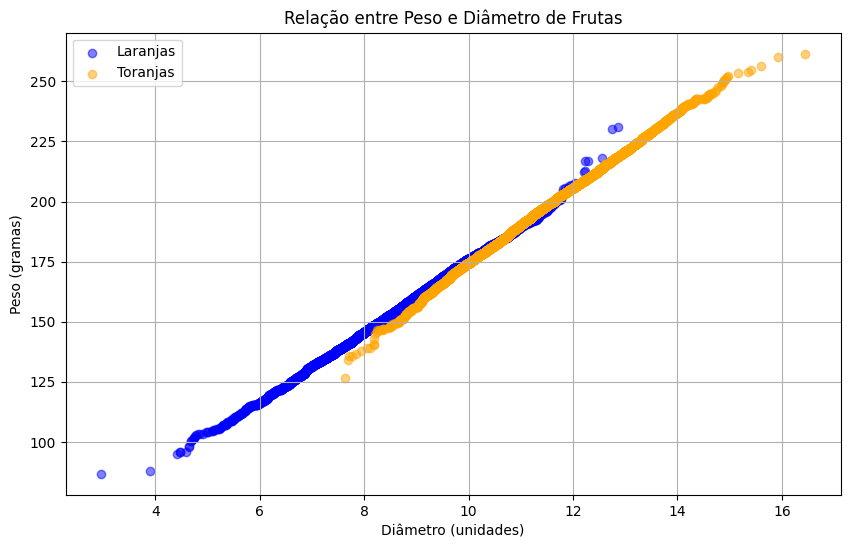

In [ ]:
import matplotlib.pyplot as plt

dados_completos = np.genfromtxt(url, delimiter=',', names=True, dtype=None, encoding='utf-8')

diametros = dados_completos['diametro']
pesos = dados_completos['peso']

diametro_laranja = diametros[0:5000]
peso_laranja = pesos[0:5000]

diametro_toranja = diametros[5000:]
peso_toranja = pesos[5000:]

print("Tipo de dado:", type(diametro_laranja))
print(f"Diâmetros Laranjas:", diametro_laranja)
print(f"Pesos Laranjas:", peso_laranja)
print(f"Diâmetros Toranjas:", diametro_toranja)
print(f"Pesos Toranjas:", peso_toranja)

plt.figure(figsize=(10, 6))
# Gráfico de dispersão para Laranjas (em azul)
plt.scatter(diametro_laranja, peso_laranja, color='blue', label='Laranjas', alpha=0.5)

# Gráfico de dispersão para Toranjas (em laranja/vermelho)
plt.scatter(diametro_toranja, peso_toranja, color='orange', label='Toranjas', alpha=0.5)

plt.title('Relação entre Peso e Diâmetro de Frutas')
plt.xlabel('Diâmetro (unidades)')
plt.ylabel('Peso (gramas)')
plt.legend() # Mostra a legenda (Laranjas vs Toranjas)
plt.grid(True) # Adiciona uma grade ao gráfico

# --- 4. Exibe o gráfico ---

plt.show()

In [ ]:
def minimos_quadrados(x, y):
    n = len(x)

    soma_x = np.sum(x)
    soma_y = np.sum(y)
    soma_xy = np.sum(x * y)
    soma_x2 = np.sum(x ** 2)

    a = (n * soma_xy - soma_x * soma_y) / (n * soma_x2 - soma_x**2)
    b = (soma_y - a * soma_x) / n

    return a, b

a_lar, b_lar = minimos_quadrados(diametro_laranja, peso_laranja)
a_tor, b_tor = minimos_quadrados(diametro_toranja, peso_toranja)

print("Laranjas -> a:", a_lar, " b:", b_lar)
print("Toranjas -> a:", a_tor, " b:", b_tor)



Laranjas -> a: 14.7997452319846  b: 27.385603812184137
Toranjas -> a: 15.70884459360376  b: 17.007102876817715


In [13]:


# Gerar dados aleatórios
np.random.seed(42)
x = np.random.uniform(0, 10, 50)

# Gerar y com b conhecido = 17
a_real = 3.5
ruido = np.random.normal(0, 2, 50)
y = a_real * x + 17 + ruido

def minimos_quadrados_somente_a(x, y, b_fixo=17):
    n = len(x)

    soma_x = np.sum(x)
    soma_y = np.sum(y)
    soma_xy = np.sum(x * y)
    soma_x2 = np.sum(x ** 2)

    # Ajuste: agora usamos b que já é conhecido
    # Fórmula isolada para a:
    # y = ax + b  →   y - b = ax
    y_ajustado = y - b_fixo

    soma_yaj = np.sum(y_ajustado)
    soma_xyaj = np.sum(x * y_ajustado)

    a = (n * soma_xyaj - soma_x * soma_yaj) / (n * soma_x2 - soma_x**2)
    return a

a_estimado = minimos_quadrados_somente_a(x, y)

print("Coeficiente angular estimado:", a_estimado)


Coeficiente angular estimado: 3.45531320077062
